In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, bisect

### all about the inequality for the rho solution (both when pi=0 (so Iacopini19) or pi != 0)

In [43]:
def l2_line_pi0(l1):
    return 2 - l1 + 2*np.sqrt(1-l1), 2 - l1 - 2*np.sqrt(1-l1)

def ineq_function(l2, l1):
    return l2**2 + l2 * (2*l1 - 4) + l1**2

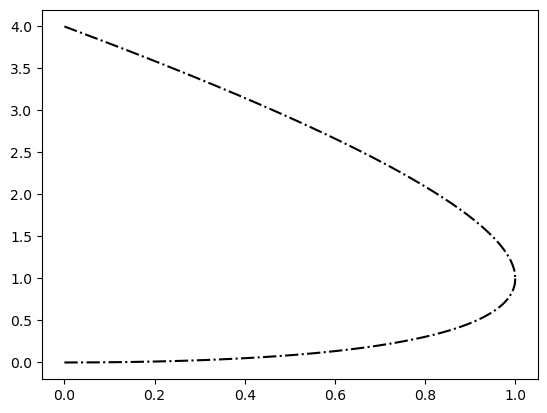

In [42]:
l1s = np.arange(0.0, 1.001, 0.001)
fig, ax = plt.subplots()
ax.plot(l1s, l2_line_pi0(l1s)[0], ls='-.', color='xkcd:black')
ax.plot(l1s, l2_line_pi0(l1s)[1], ls='-.', color='xkcd:black')

In [44]:
ineq_function(0.01, 0.8)

0.6161000000000001

In [ ]:
def pi_thresh_m_neq_0_sol(l2, l1):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3, term1 + term2 - term3





# equation to send to the root finder
def eq_isoline(l2, l1, pi, sign):
    lambda_func = pi_thresh_m_neq_0_sol(l1, l2)
    return lambda_func[sign] - pi

def eq_isoline_rho_plus(l2, l1, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3 - pi

In [28]:
l, pi, sign = 1.5, 0.05, 0
a, b = 0.5, 1.8
# a, b = 0.05, 8
sol, r = bisect(eq_isoline_rho_plus, a, b, args=(l, pi), full_output=True)
# print(sol)
print(r)

# l = 0.5
# sol, r = bisect(eq_isoline_rho_plus, 0.05, 1.0, args=(l, pi), full_output=True)
# print(sol)
# print(r)

      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: 0.8731637481302642


In [23]:
sol

0.8731637481302642

In [45]:
l1s = np.arange(0.0, 2.05, 0.05)
pi, sign = 0.1, 0

sols = []
a, b = 1e-5, 8.0

for l in l1s:
    try:
        sol, r = bisect(eq_isoline_rho_plus, a, b, args=(l, pi), full_output=True)
    except ValueError:
        sol = float('nan')
    sols.append(sol)

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1245/3522403858.py:20: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)


/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1245/3091355307.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 2 - l1 + 2*np.sqrt(1-l1), 2 - l1 - 2*np.sqrt(1-l1)


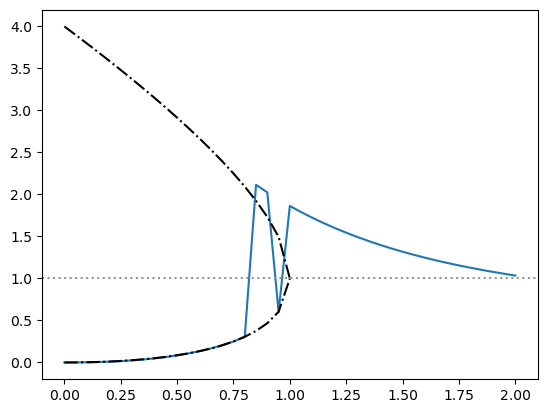

In [46]:
fig, ax = plt.subplots()
ax.plot(l1s, sols)
ax.plot(l1s, l2_line_pi0(l1s)[0], ls='-.', color='xkcd:black')
ax.plot(l1s, l2_line_pi0(l1s)[1], ls='-.', color='xkcd:black')
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')

In [19]:
def plotter(f, c):
    x = np.linspace(0.001, 2, 1000)
    y = np.linspace(0.001, 10, 1000)
    X, Y = np.meshgrid(x,y)
    Z1, Z2 = pi_thresh_m_neq_0_sol(X,Y)
    fig, ax = plt.subplots(1,1,figsize=(4,4), constrained_layout=True)
    ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')
    cs = ax.contour(X,Y,Z1, levels=[c], colors='xkcd:red')
    cs = ax.contour(X,Y,Z2, levels=[c], colors='xkcd:blue')
    ax.plot(x, l2_line_pi0(x), color='xkcd:black', ls='-.')
    fig.savefig(f'pi_thresh_contour_lines_space_l1_l2_pi_{c}.png')

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:4: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 2-l1+2*np.sqrt(1-l1)


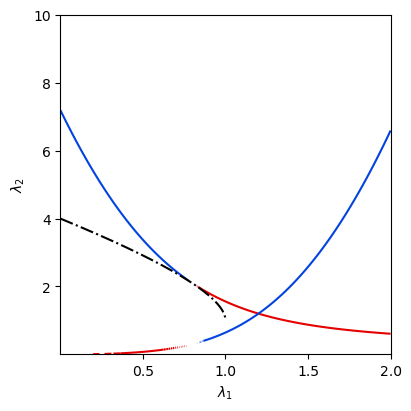

In [20]:
pi = 0.05
plotter(pi_thresh_m_neq_0_sol, pi)